In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [152]:
df=pd.read_excel(r"C:\Users\om\Downloads\Social Media Data.xlsx",sheet_name="Social Media Data")

In [153]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [155]:
df.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [156]:
df.describe(include="object")

,Taken_product,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11685,11760,11729,11657,11760
unique,2,10,30,7,15,4,2
top,No,Tab,1,3,Beach,No,No
freq,9864,4172,4543,4561,2424,8355,9952


array([[<Axes: title={'center': 'UserID'}>,
        <Axes: title={'center': 'Yearly_avg_view_on_travel_page'}>,
        <Axes: title={'center': 'total_likes_on_outstation_checkin_given'}>],
       [<Axes: title={'center': 'Yearly_avg_comment_on_travel_page'}>,
        <Axes: title={'center': 'total_likes_on_outofstation_checkin_received'}>,
        <Axes: title={'center': 'week_since_last_outstation_checkin'}>],
       [<Axes: title={'center': 'montly_avg_comment_on_company_page'}>,
        <Axes: title={'center': 'travelling_network_rating'}>,
        <Axes: title={'center': 'Adult_flag'}>],
       [<Axes: title={'center': 'Daily_Avg_mins_spend_on_traveling_page'}>,
        <Axes: >, <Axes: >]], dtype=object)

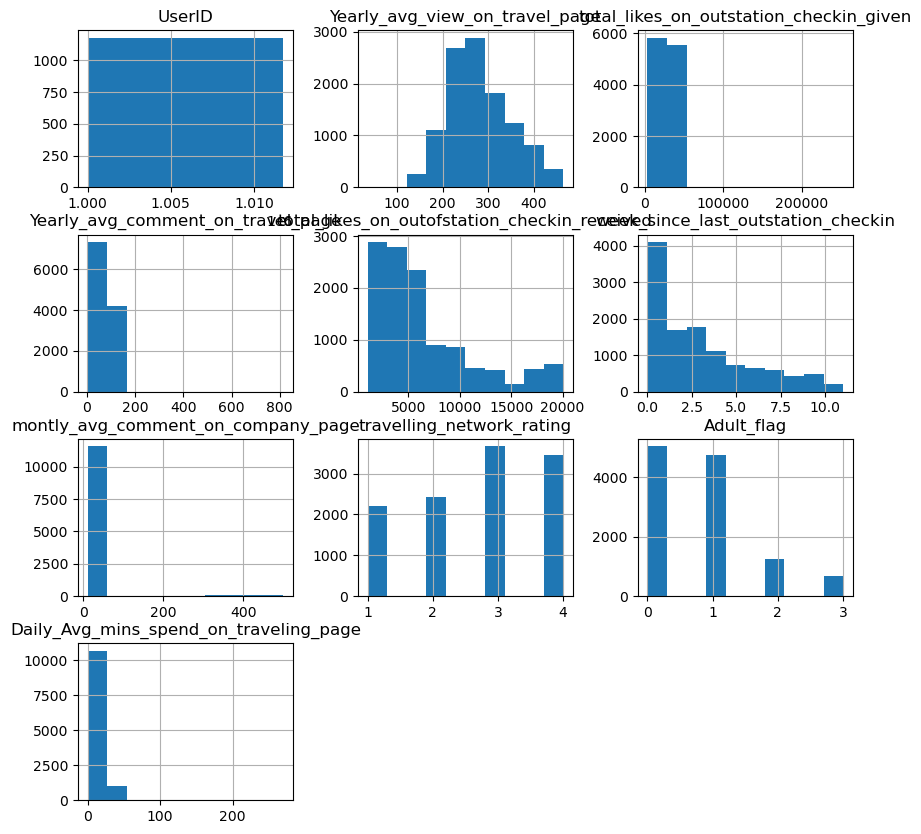

In [157]:
df.hist(figsize=(10,10))

In [158]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [159]:
a=["Taken_product","preferred_device","yearly_avg_Outstation_checkins","member_in_family","preferred_location_type","following_company_page","working_flag"]

In [160]:
for i in a:
    print(i)
    print(df[i].unique())
    print("\n")


Taken_product
['Yes' 'No']


preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']


yearly_avg_Outstation_checkins
[1 24 23 27 16 15 26 19 21 11 10 25 12 18 29 nan 22 14 20 28 17 13 '*' 5 8
 2 3 9 7 6 4]


member_in_family
[2 1 4 'Three' 3 5 10]


preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']


following_company_page
['Yes' 'No' nan 1 0]


working_flag
['No' 'Yes']




In [161]:
df["preferred_device"]=df["preferred_device"].where(df["preferred_device"]!='ANDROID',other="Android")

In [162]:
df["preferred_device"]=df["preferred_device"].where(df["preferred_device"]!='Android OS',other="Android")

In [163]:
df["preferred_device"]=df["preferred_device"].where(df["preferred_device"]!='Other',other='Others')

In [164]:
df["yearly_avg_Outstation_checkins"]=df["yearly_avg_Outstation_checkins"].where(df["yearly_avg_Outstation_checkins"]!="*",other=np.nan)

In [165]:
df["member_in_family"]=df["member_in_family"].where(df["member_in_family"]!="Three",other=3)

In [166]:
df["following_company_page"].replace({1:"Yes",0:"No"},inplace=True)

In [167]:
for i in a:
    print(i)
    print(df[i].unique())
    print("\n")


Taken_product
['Yes' 'No']


preferred_device
['iOS and Android' 'iOS' 'Android' nan 'Others' 'Tab' 'Laptop' 'Mobile']


yearly_avg_Outstation_checkins
[1 24 23 27 16 15 26 19 21 11 10 25 12 18 29 nan 22 14 20 28 17 13 5 8 2 3
 9 7 6 4]


member_in_family
[2 1 4 3 5 10]


preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']


following_company_page
['Yes' 'No' nan]


working_flag
['No' 'Yes']




<Axes: >

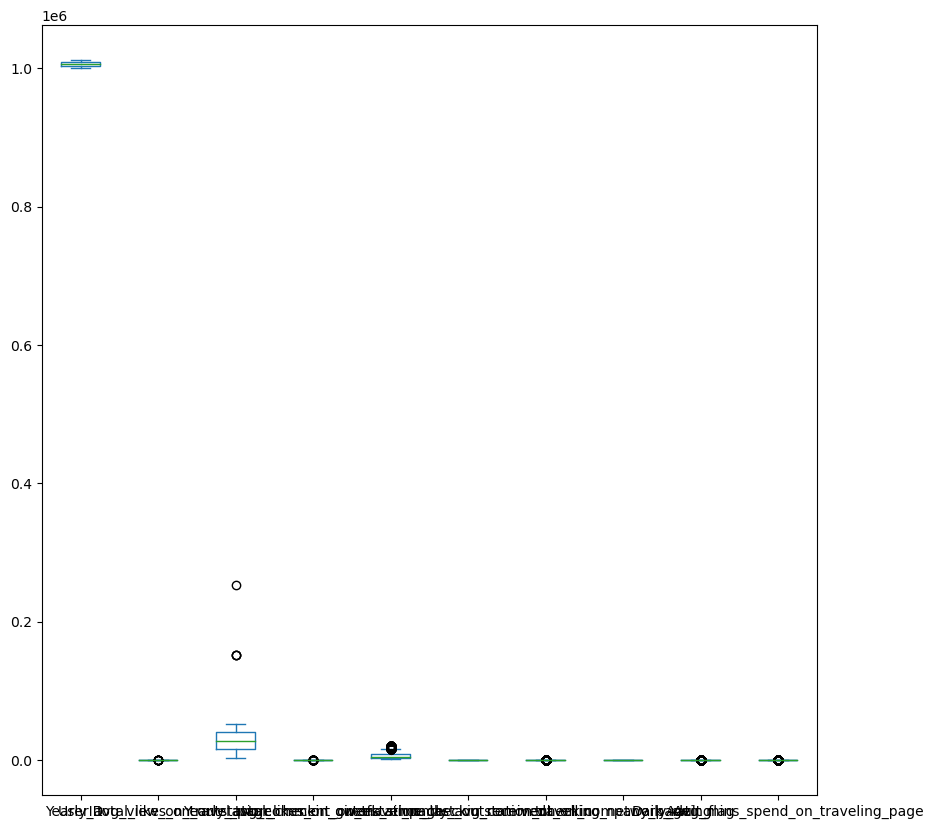

In [168]:
df.plot.box(figsize=(10,10))

In [169]:
df.groupby("preferred_location_type").agg({"working_flag":"count"})

,working_flag
preferred_location_type,
Beach,2424
Big Cities,636
Entertainment,516
Financial,2409
Game,12
Hill Stations,108
Historical site,1856
Medical,1845
Movie,5


In [170]:
loc=pd.pivot_table(df,index="Taken_product",columns="preferred_location_type",values="working_flag",aggfunc="count")

<Axes: xlabel='preferred_location_type'>

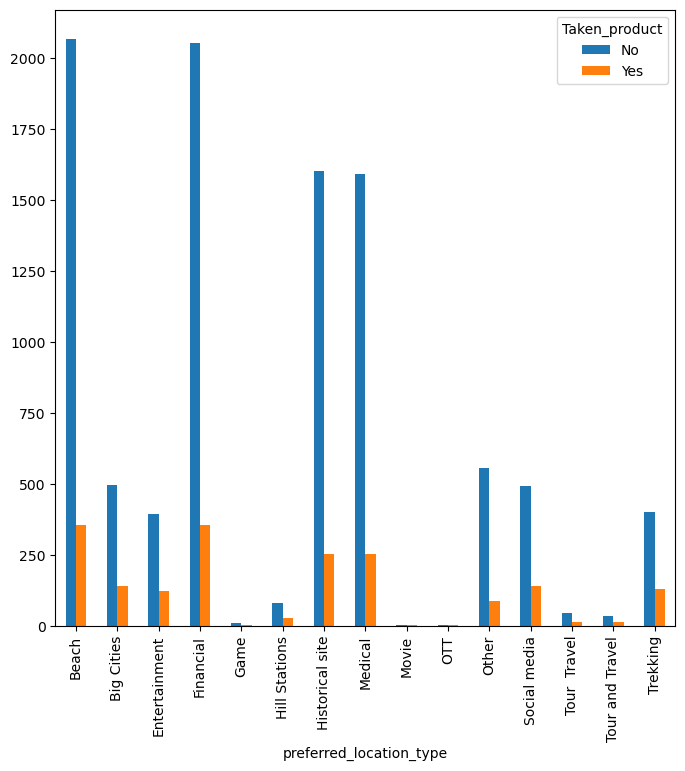

In [171]:
loc.T.plot.bar(figsize=(8,8))

In [172]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [173]:
df["preferred_location_type"].mode()

0    Beach
Name: preferred_location_type, dtype: object

In [174]:
df["preferred_location_type"].fillna("Beach",inplace=True)

In [175]:
df["preferred_device"].mode()

0    Tab
Name: preferred_device, dtype: object

In [176]:
df["preferred_device"].fillna("Tab",inplace=True)

In [177]:
pre_dev=df.groupby("preferred_location_type")["Yearly_avg_view_on_travel_page"].mean()
pre_dev=pd.DataFrame(pre_dev)
df=pd.merge(df,pre_dev,on="preferred_location_type",how="left")
def pre_dev(a):
    if np.isnan(a["Yearly_avg_view_on_travel_page_x"]):
        return a["Yearly_avg_view_on_travel_page_y"]
    else:
        return a["Yearly_avg_view_on_travel_page_x"]

df["Yearly_avg_view_on_travel_page"]=df.apply(pre_dev,axis=1)
df.drop(["Yearly_avg_view_on_travel_page_y","Yearly_avg_view_on_travel_page_x"],axis=1,inplace=True)

In [178]:
pre_dev=df.groupby("preferred_location_type")["total_likes_on_outstation_checkin_given"].mean()
pre_dev=pd.DataFrame(pre_dev)
df=pd.merge(df,pre_dev,on="preferred_location_type",how="left")
def pre_dev(a):
    if np.isnan(a["total_likes_on_outstation_checkin_given_x"]):
        return a["total_likes_on_outstation_checkin_given_y"]
    else:
        return a["total_likes_on_outstation_checkin_given_x"]

df["total_likes_on_outstation_checkin_given"]=df.apply(pre_dev,axis=1)
df.drop(["total_likes_on_outstation_checkin_given_y","total_likes_on_outstation_checkin_given_x"],axis=1,inplace=True)

In [179]:
pre_dev=df.groupby("preferred_location_type")["yearly_avg_Outstation_checkins"].mean()
pre_dev=pd.DataFrame(pre_dev)
df=pd.merge(df,pre_dev,on="preferred_location_type",how="left")
def pre_dev(a):
    if np.isnan(a["yearly_avg_Outstation_checkins_x"]):
        return a["yearly_avg_Outstation_checkins_y"]
    else:
        return a["yearly_avg_Outstation_checkins_x"]

df["yearly_avg_Outstation_checkins"]=df.apply(pre_dev,axis=1)
df.drop(["yearly_avg_Outstation_checkins_y","yearly_avg_Outstation_checkins_x"],axis=1,inplace=True)

In [180]:
pre_dev=df.groupby("preferred_location_type")["Yearly_avg_comment_on_travel_page"].mean()
pre_dev=pd.DataFrame(pre_dev)
df=pd.merge(df,pre_dev,on="preferred_location_type",how="left")
def pre_dev(a):
    if np.isnan(a["Yearly_avg_comment_on_travel_page_x"]):
        return a["Yearly_avg_comment_on_travel_page_y"]
    else:
        return a["Yearly_avg_comment_on_travel_page_x"]

df["Yearly_avg_comment_on_travel_page"]=df.apply(pre_dev,axis=1)
df.drop(["Yearly_avg_comment_on_travel_page_y","Yearly_avg_comment_on_travel_page_x"],axis=1,inplace=True)

In [181]:
df["following_company_page"].mode()

0    No
Name: following_company_page, dtype: object

In [182]:
df["following_company_page"].fillna("No",inplace=True)

In [183]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
preferred_device                                0
member_in_family                                0
preferred_location_type                         0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
Yearly_avg_comment_on_travel_page               0
dtype: int64

In [184]:
df["member_in_family"]=df["member_in_family"].astype(int)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   preferred_device                              11760 non-null  object 
 3   member_in_family                              11760 non-null  int32  
 4   preferred_location_type                       11760 non-null  object 
 5   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 6   week_since_last_outstation_checkin            11760 non-null  int64  
 7   following_company_page                        11760 non-null  object 
 8   montly_avg_comment_on_company_page            11760 non-null  int64  
 9   working_flag                                  11760 non-null 

In [186]:
df=pd.get_dummies(df,prefix=["PD_","PLT_"],columns=["preferred_device","preferred_location_type"])

In [187]:
df.head()

,UserID,Taken_product,member_in_family,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,...,PLT__Hill Stations,PLT__Historical site,PLT__Medical,PLT__Movie,PLT__OTT,PLT__Other,PLT__Social media,PLT__Tour Travel,PLT__Tour and Travel,PLT__Trekking
0,1000001,Yes,2,5993,8,Yes,11,No,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1000002,No,1,5130,1,No,23,Yes,4,1,...,0,0,0,0,0,0,0,0,0,0
2,1000003,Yes,2,2090,6,Yes,15,No,2,0,...,0,0,0,0,0,1,0,0,0,0
3,1000004,No,4,2909,1,Yes,11,No,3,0,...,0,0,0,0,0,0,0,0,0,0
4,1000005,No,1,3468,9,No,12,No,4,1,...,0,0,1,0,0,0,0,0,0,0


In [188]:
le=LabelEncoder()

In [189]:
tp=pd.DataFrame(le.fit_transform(df["Taken_product"]),columns=["Taken_product"])   #yes-1, no-0

In [190]:
fcp=pd.DataFrame(le.fit_transform(df["following_company_page"]),columns=["following_company_page"])  #yes-1 no-0

In [191]:
wf=pd.DataFrame(le.fit_transform(df["working_flag"]),columns=["working_flag"])    #no-0 yes-1

In [193]:
df=df.drop(["Taken_product","following_company_page","working_flag"],axis=1)

In [194]:
df=pd.concat([df,tp,fcp,wf],axis=1)

In [196]:
df.head()

,UserID,member_in_family,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,...,PLT__Movie,PLT__OTT,PLT__Other,PLT__Social media,PLT__Tour Travel,PLT__Tour and Travel,PLT__Trekking,Taken_product,following_company_page,working_flag
0,1000001,2,5993,8,11,1,0,8,307.0,38570.0,...,0,0,0,0,0,0,0,1,1,0
1,1000002,1,5130,1,23,4,1,10,367.0,9765.0,...,0,0,0,0,0,0,0,0,0,1
2,1000003,2,2090,6,15,2,0,7,277.0,48055.0,...,0,0,1,0,0,0,0,1,1,0
3,1000004,4,2909,1,11,3,0,8,247.0,48720.0,...,0,0,0,0,0,0,0,0,1,0
4,1000005,1,3468,9,12,4,1,6,202.0,20685.0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df=df.drop(["UserID"],axis=1)

In [199]:
minmax=MinMaxScaler()

In [202]:
df=pd.DataFrame(minmax.fit_transform(df),columns=df.columns)

In [203]:
df.head()

,member_in_family,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,...,PLT__Movie,PLT__OTT,PLT__Other,PLT__Social media,PLT__Tour Travel,PLT__Tour and Travel,PLT__Trekking,Taken_product,following_company_page,working_flag
0,0.111111,0.261545,0.727273,0.000000,0.000000,0.000000,0.029630,0.634033,0.140641,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.000000,0.216257,0.090909,0.024540,1.000000,0.333333,0.037037,0.773893,0.024894,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.111111,0.056728,0.545455,0.008180,0.333333,0.000000,0.025926,0.564103,0.178755,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.333333,0.099706,0.090909,0.000000,0.666667,0.000000,0.029630,0.494172,0.181427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.129041,0.818182,0.002045,1.000000,0.333333,0.022222,0.389277,0.068774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
y=df[["Taken_product"]]

In [209]:
x=df.drop(["Taken_product"],axis=1)

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [212]:
log_reg=LogisticRegression()

In [213]:
log_reg.fit(x_train,y_train)

C:\ProgramData\New folder\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [214]:
log_reg.coef_

array([[ 0.20389597, -2.20964772,  1.63184882, -0.11703539, -0.58781678,
        -1.65728554, -1.18612224, -2.3992646 , -1.97838468,  0.88651379,
         0.0630556 , -0.74063366,  0.74266159, -0.6199251 ,  0.05372637,
        -0.00888458,  0.64408396, -0.05504868, -0.44709593,  0.29586973,
         0.36320035, -0.34063683, -0.36435516,  0.17665901, -0.6560385 ,
        -0.51388147,  0.02269499,  1.2258444 , -0.81906032,  0.29047929,
         0.17356705,  0.45248424,  0.15624906,  1.48511004, -0.05425371]])

In [215]:
log_reg.intercept_

array([0.07787181])

In [216]:
log_reg.score(x_train,y_train)

0.8647959183673469

In [218]:
y_predicted=log_reg.predict(x_test)

In [219]:
log_reg.score(x_test,y_test)

0.8633786848072562

In [220]:
from sklearn import metrics

In [222]:
c=metrics.confusion_matrix(y_test,y_predicted)

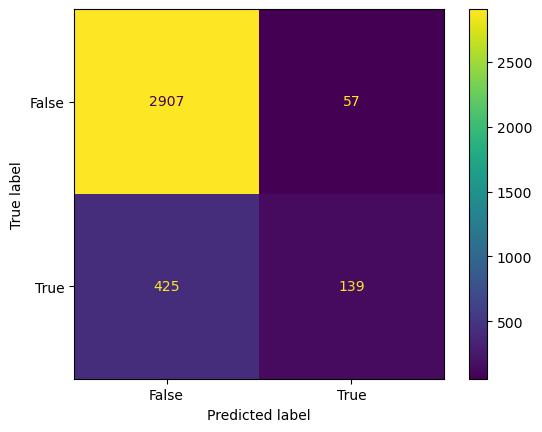

In [225]:
cm=metrics.ConfusionMatrixDisplay(c,display_labels=[False,True])
cm.plot()
plt.show()

In [227]:
metrics.classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n         0.0       0.87      0.98      0.92      2964\n         1.0       0.71      0.25      0.37       564\n\n    accuracy                           0.86      3528\n   macro avg       0.79      0.61      0.64      3528\nweighted avg       0.85      0.86      0.83      3528\n'